In [32]:
import pandas
dataset = pandas.read_csv('Sample_Input.csv', delimiter = '\t')
dataset.head()

,QUESTION
0,When converting a lead into account the Protec...
1,"I noticed that in the emails we save in SF, wh..."
2,I did a quote for Birla Carbon USA 00054156 bu...
3,I had this same problem with a customer name c...
4,"I found one problem, I had one opportunity I c..."


In [41]:
# Select the content column to analyze
#datacol = input('\n---\nWhich column contains the text data you would like to analyze?\n\n')
datacol = 'QUESTION'

In [42]:
# View 10 most common words prior to text pre-processing
freq = pandas.Series(' '.join(map(str, dataset[datacol])).split()).value_counts()[:10]
freq
#text1='When converting a lead into account the Protective Venting submarket field is not taken over. After conversion it has to be re-entered manually. Can you fix this? TXS, Korina @PSD Global Account Managers​'
#freq = pandas.Series(' '.join(map(str, text1))).value_counts()
#freq

the     321
to      277
I       202
a       163
and     117
is      116
in       97
this     91
it       71
not      68
dtype: int64

In [43]:
# View 10 least common words prior to text pre-processing
freq1 =  pandas.Series(' '.join(map(str,dataset 
         [datacol])).split()).value_counts()[-10:]
freq

the     321
to      277
I       202
a       163
and     117
is      116
in       97
this     91
it       71
not      68
dtype: int64

In [44]:
# Import libraries for text preprocessing
import re
import nltk

# You only need to download these resources once. After you run this 
# the first time--or if you know you already have these installed--
# you can comment these two lines out (with a #)
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhisheksharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abhisheksharma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [ ]:
# Load a set of custom stop words from a text file (one stopword per line)
csw = set(line.strip() for line in open('custom-stopwords.txt'))
csw = [sw.lower() for sw in csw]
print(sorted(csw))

In [ ]:
# Combine custom stop words with stop_words list
stop_words = stop_words.union(csw)
print(sorted(stop_words))

In [47]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [49]:
#View sample pre-processed corpus item
corpus[100]

'issue last week page running extremely slow click task past email quote load screen gray also delay type sf since last big upgrade type system error causing slow use sf'

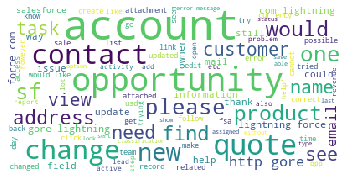

In [51]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordcloud.png", dpi=900)

In [52]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [53]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['converting',
 'lead',
 'account',
 'protective',
 'venting',
 'submarket',
 'field',
 'taken',
 'conversion',
 'entered']

        Keyword  Frequency
0       account        112
1   opportunity         62
2         quote         46
3           new         44
4       contact         43
5        change         40
6     lightning         39
7         would         33
8        please         32
9          view         30
10           sf         27
11          one         26
12         gore         25
13         help         25
14         find         23
15        could         23
16      product         23
17        email         22
18      address         22
19        force         22


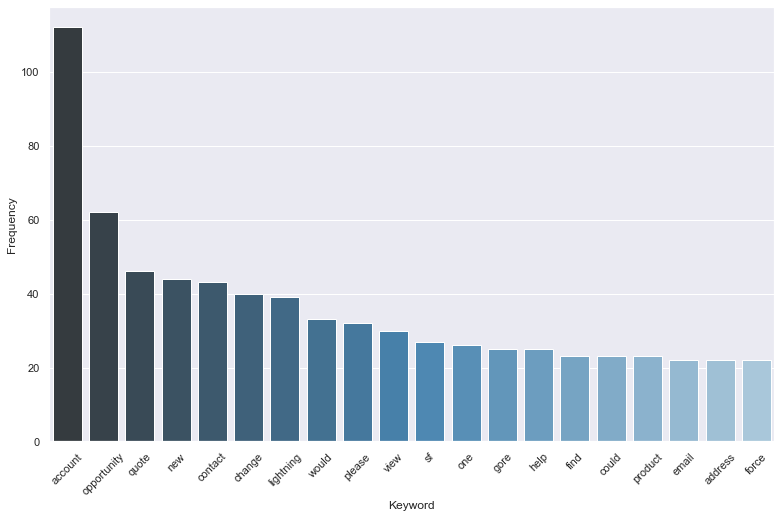

In [56]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
top_df.to_csv('_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig("_keyword.png", bbox_inches = "tight")